In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import ks_2samp
import glob
import random

In [2]:
def KS_Test(data_1, data_2, alpha=0.05, just_return_result=False, long_KS_box=False):

    c_of_alpha = np.sqrt(  np.log(2/alpha)  /  2  )

    if just_return_result == False:

        D = c_of_alpha * np.sqrt( (len(data_1)+len(data_2)) / (len(data_1)*len(data_2)) )
        test_result = ks_2samp(data_1, data_2)
        statistic = test_result[0]
        p_value = test_result[1]

        print(test_result)
        print(f'Critical D-Value = {np.round(D, 3)}')
        print()

        if statistic <= D:
            print(f'{np.round(statistic, 3)} < {np.round(D, 3)}   ==>  Hypothesis is accepted !')

        elif statistic > D:
            print(f'{np.round(statistic, 3)} > {np.round(D, 3)}   ==>  Hypothesis is rejected !')

In [3]:
#hpath = '/media/bartosz/Volume/highz_data/'
#dpath = '/media/bartosz/Volume/BOSS_DR14/'

hpath = '/media/bartosz/USB STICK/highz_data/'
dpath = '/media/bartosz/USB STICK/BOSS_DR14/'


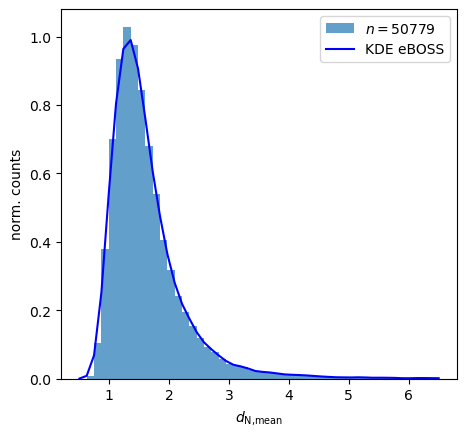

0.7385814762587459

In [4]:
##### Neighbor distance distribution #####

# eboss spectra
nnfile = np.loadtxt(dpath + 'nearest_neighbors_snr10.txt',dtype='str')
nn_id = nnfile[:,0]
nn_Ds = nnfile[:,8:]
d_means = [np.mean([float(j) for j in nn]) for nn in nn_Ds]

# sort average distances
sort_index = np.argsort(d_means)
idx_sorted = nn_id[sort_index]
dmean_sorted = np.sort(d_means)
#dmean_sorted = dmean_sorted[:-100]


# high z spectra
hnnfile = np.loadtxt(hpath + 'previous/highZ_NN_full_sc.txt',dtype='str')
hnn_id = hnnfile[:,0]
hnn_Ds = hnnfile[:,6:]
hd_means = [np.mean([float(j) for j in nn]) for nn in hnn_Ds]

# sort average distances
hsort_index = np.argsort(hd_means)
hidx_sorted = hnn_id[hsort_index]
hdmean_sorted = np.sort(hd_means)

# calculate probability of d_N being drawn from KDE
p=[]
kernel = gaussian_kde(dmean_sorted, bw_method='scott')
for i, id in enumerate(hnn_id):    
    d = hd_means[i]
    prob = kernel.integrate_box_1d(d,np.inf)
    p.append(prob)
p_sorted = np.array(sorted(p,reverse=True))

# plot histogram
bins = np.linspace(0.5, 6.5, 50)
fig, ax = plt.subplots()
fig.set_figwidth(5.1)
ax.hist(dmean_sorted,bins,density=True,alpha=0.7,color='tab:blue',label='$n={}$'.format(len(dmean_sorted)))
#cnts, values, bars =ax.hist(hd_means,bins,density=True,alpha=0.7,edgecolor='grey',label='$n={}$'.format(len(hdmean_sorted)))

# # Define the colormap and normalization
# cmap = plt.cm.Reds
# norm = plt.Normalize(vmin=min(p_sorted), vmax=max(p_sorted))

# for i, (cnt, c, bar) in enumerate(zip(cnts, p_sorted, bars)):
#     bar.set_facecolor(cmap(norm(c)))

# # Add a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # Dummy array for colorbar
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label(r'$P_\text{eBOSS}$')

plt.xlabel(r'$d_\text{N,mean}$')
plt.ylabel('norm. counts')


# Kernel Density Estimation
# eBOSS
kernel = gaussian_kde(dmean_sorted, bw_method='scott')
y = kernel.pdf(bins)
plt.plot(bins,y,color='blue',label='KDE eBOSS')

plt.legend()
#plt.savefig('plots/distr_eboss_highz_eg.pdf',format='pdf')
plt.show()

kernel.integrate_box_1d(1,2)

In [5]:
meta_data = np.loadtxt(hpath + 'meta_data_v2.txt', dtype='str')
names = meta_data[:,0]
# Exclude BAL and reddened quasars
exc = ['J1535+1943','PSOJ215.1514-16.0417','ULASJ0148+0600','ULASJ1207+0630','VIKJ2318-3029','PSOJ183-12']
filter2 = np.array([x in exc for x in names])
names = names[~filter2]
names


array(['ATLASJ025.6821-33.4627', 'CFHQSJ1509-1749', 'PSOJ036+03',
       'SDSSJ0100+2802', 'SDSSJ0818+1722', 'SDSSJ0836+0054',
       'SDSSJ0927+2001', 'SDSSJ1030+0524', 'SDSSJ1306+0356',
       'ULASJ1319+0950', 'J0108+0711', 'J1335-0328', 'J2100-1715',
       'J2207-0416', 'PSOJ004+17', 'PSOJ011+09', 'PSOJ056-16',
       'PSOJ159-02', 'PSOJ308-21', 'PSOJ340-18', 'VDESJ0330-4025',
       'VIKJ0046-2837', 'PSOJ060+24', 'PSOJ242-12', 'PSOJ308-27',
       'PSOJ359-06', 'J1212+0505', 'PSOJ025-11', 'PSOJ217-16',
       'VDESJ0224-4711', 'PSOJ158-14', 'PSOJ029-29', 'PSOJ323+12',
       'ATLASJ029.9915-36.5658'], dtype='<U22')

ATLASJ025.6821-33.4627


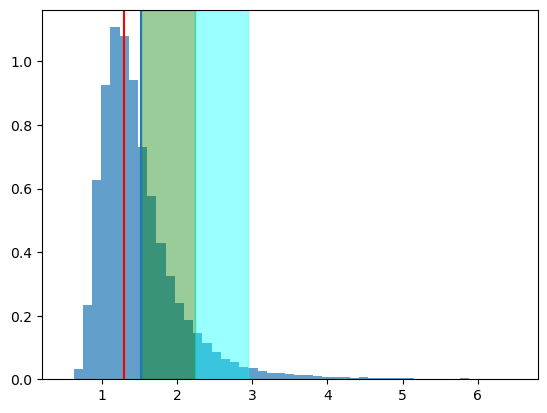

CFHQSJ1509-1749


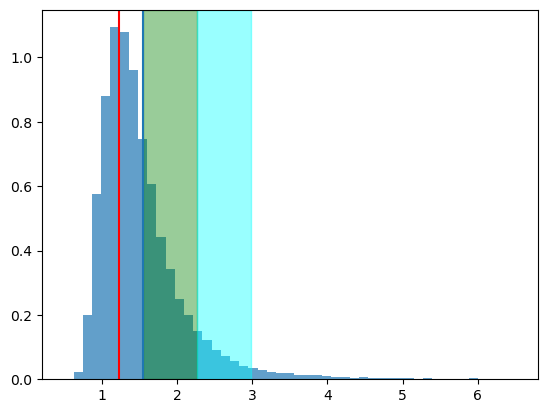

PSOJ036+03


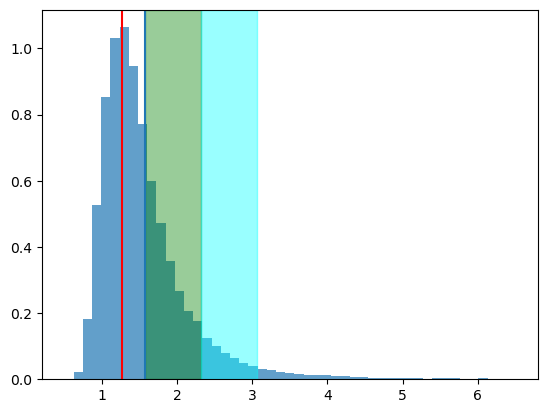

SDSSJ0100+2802


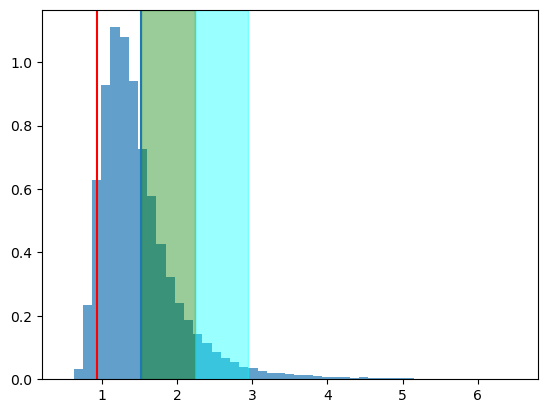

SDSSJ0818+1722


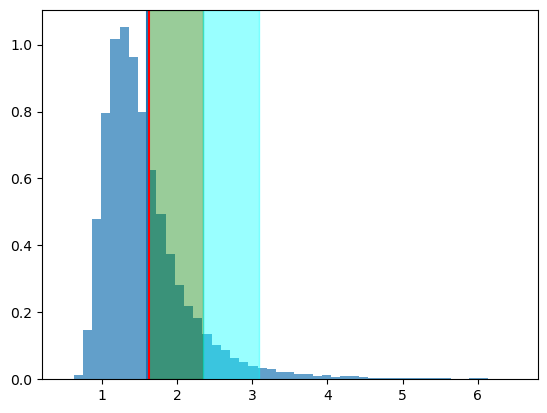

SDSSJ0836+0054


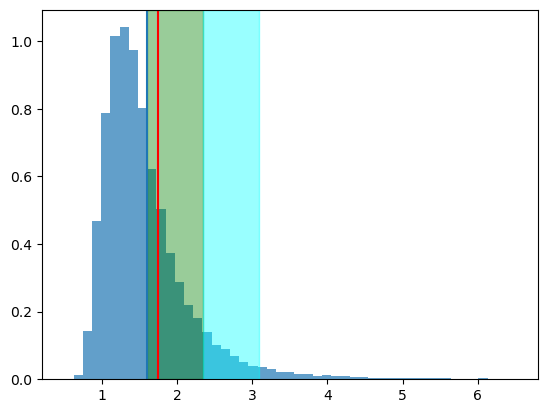

SDSSJ0927+2001


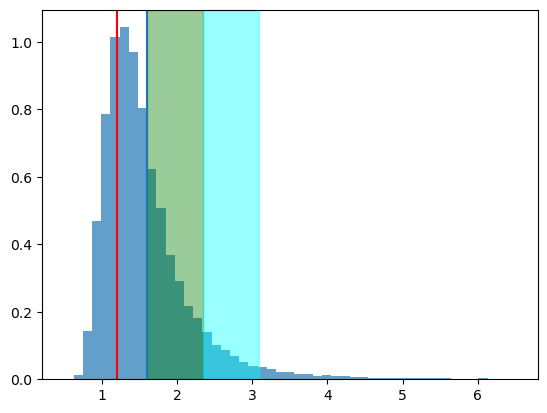

SDSSJ1030+0524


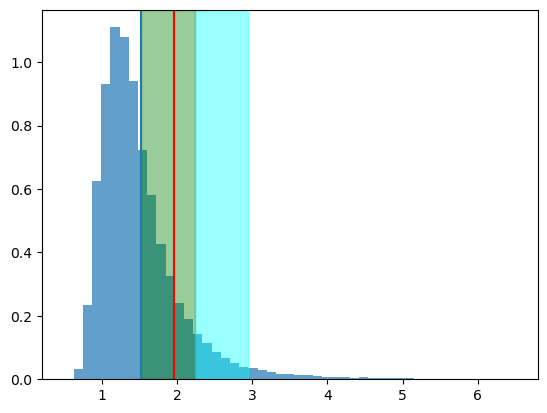

SDSSJ1306+0356


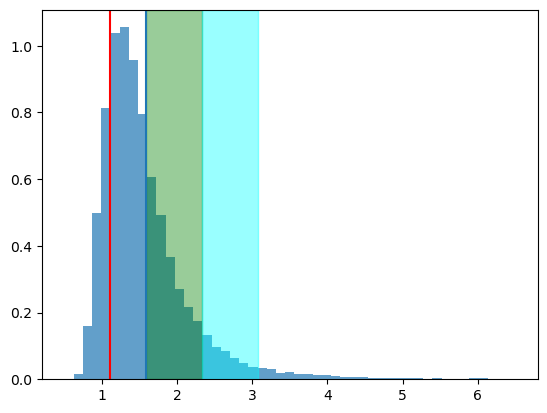

ULASJ1319+0950


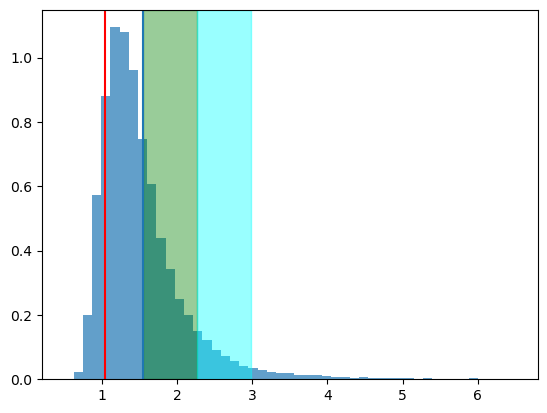

J0108+0711


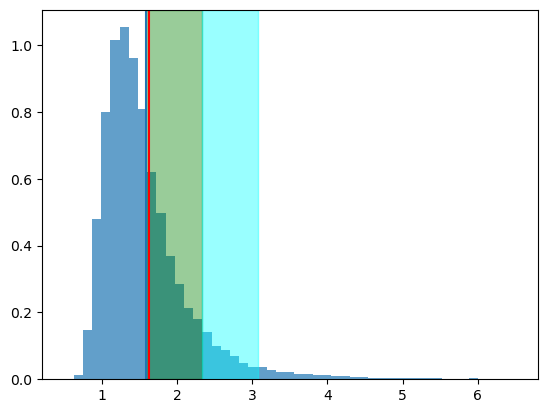

J1335-0328


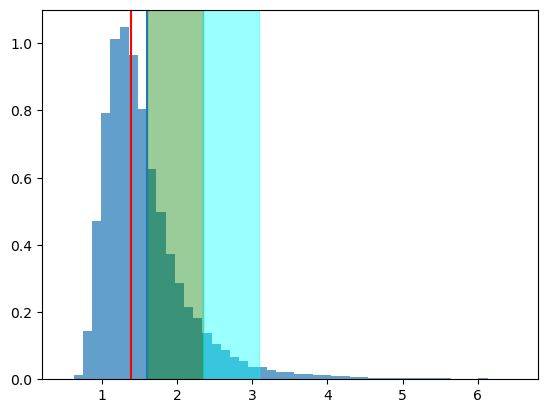

J2100-1715


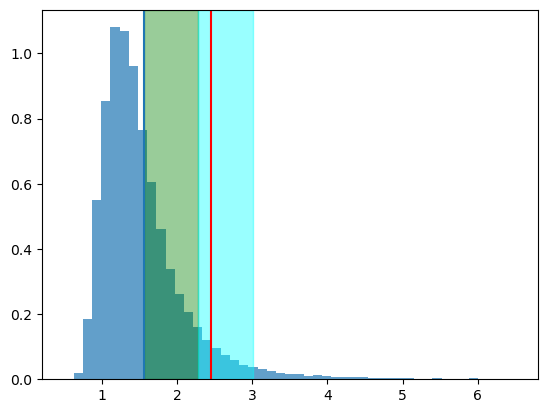

J2207-0416


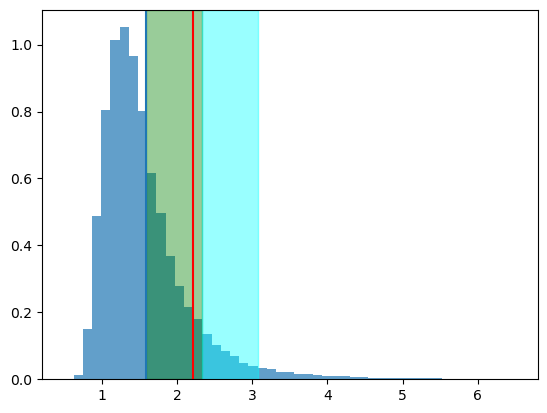

PSOJ004+17


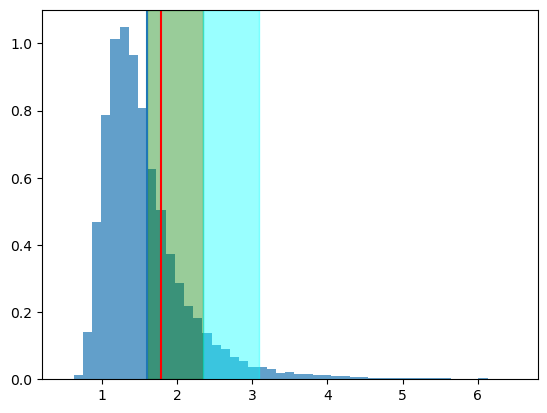

PSOJ011+09


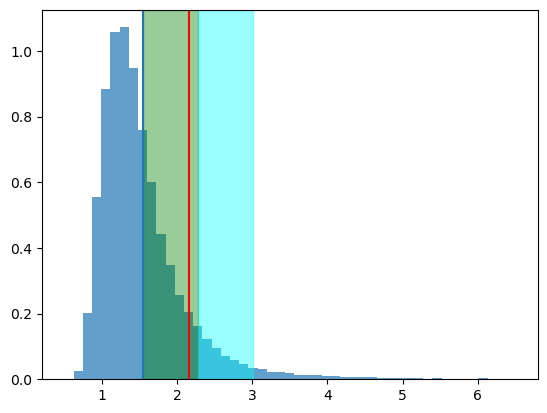

PSOJ056-16


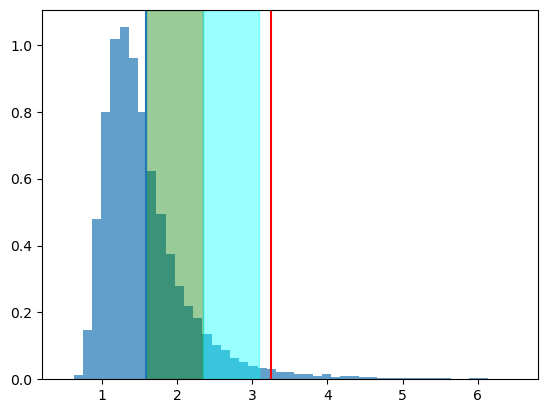

PSOJ159-02


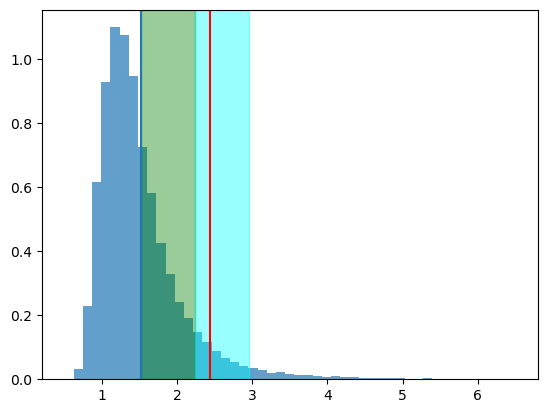

PSOJ308-21


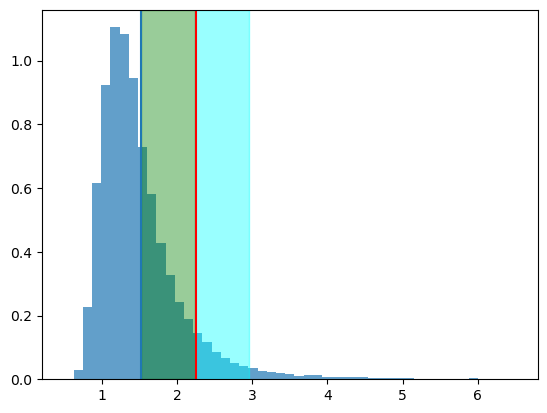

PSOJ340-18


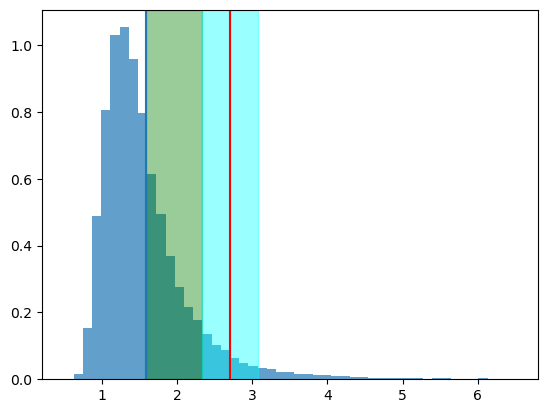

VDESJ0330-4025


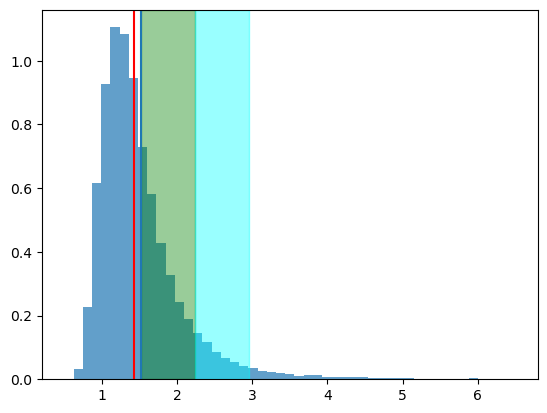

VIKJ0046-2837


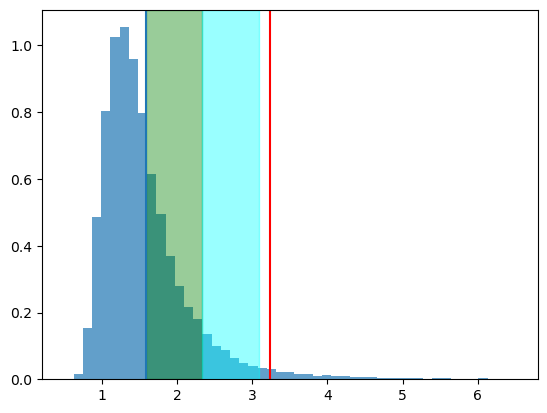

PSOJ060+24


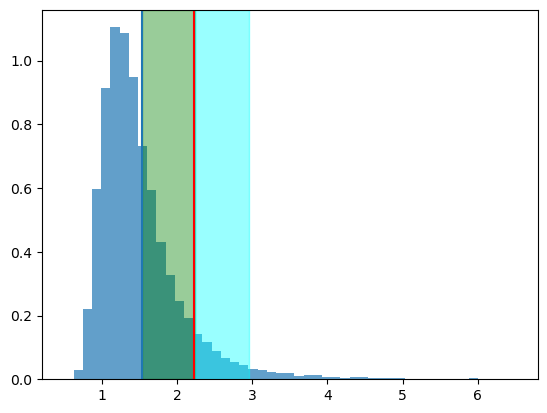

PSOJ242-12


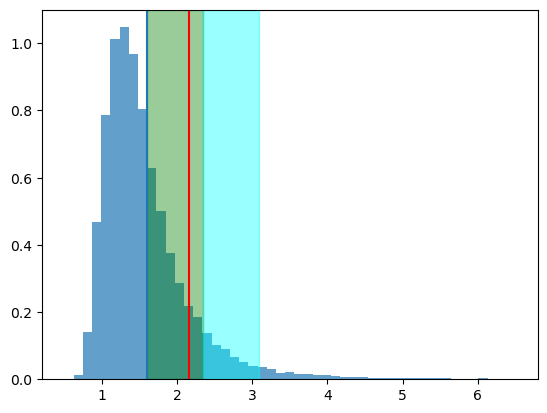

PSOJ308-27


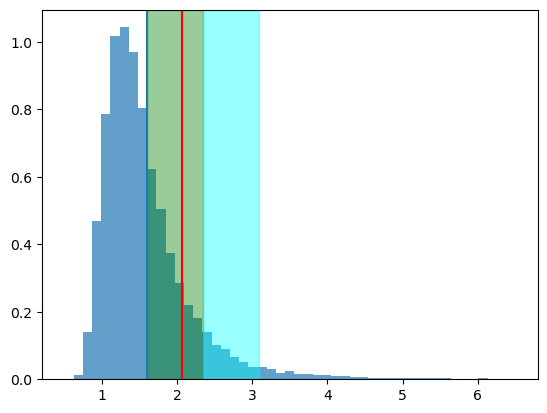

PSOJ359-06


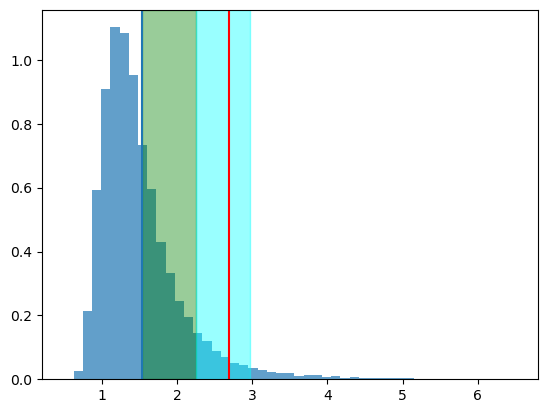

J1212+0505


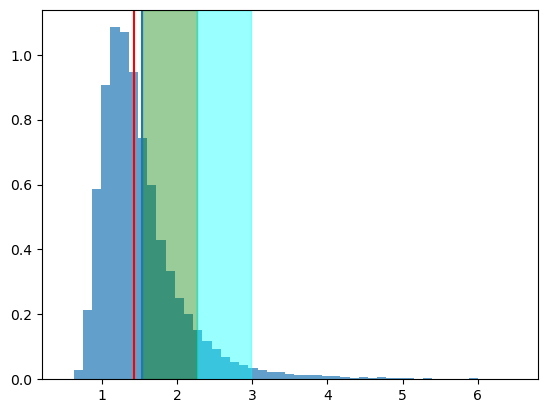

PSOJ025-11


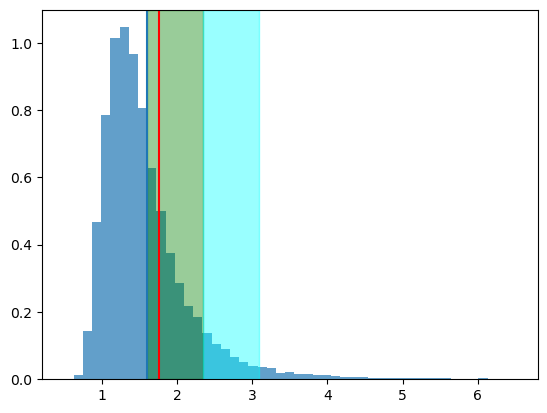

PSOJ217-16


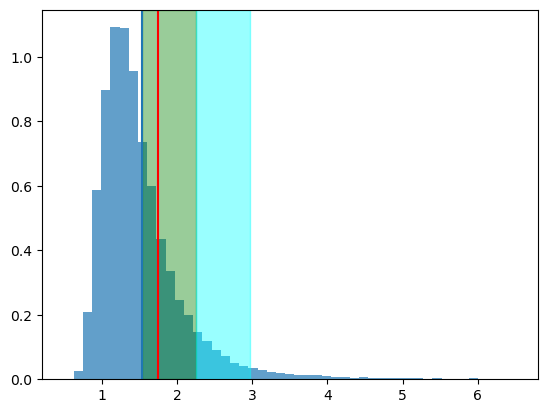

VDESJ0224-4711


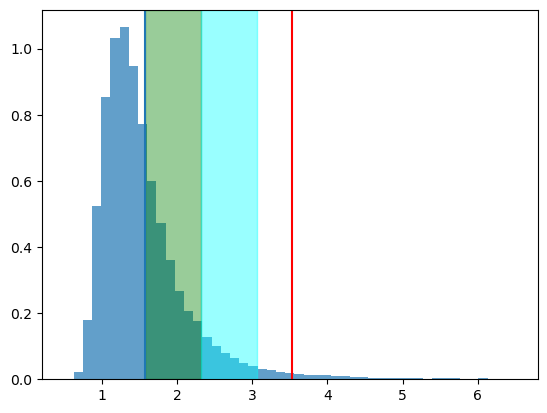

PSOJ158-14


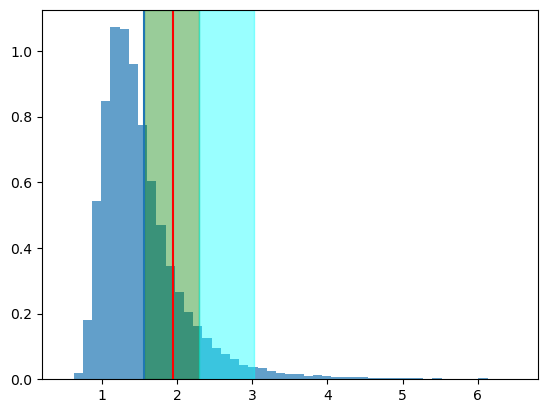

PSOJ029-29


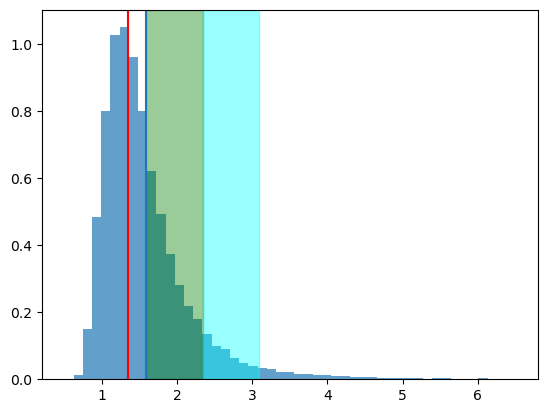

PSOJ323+12


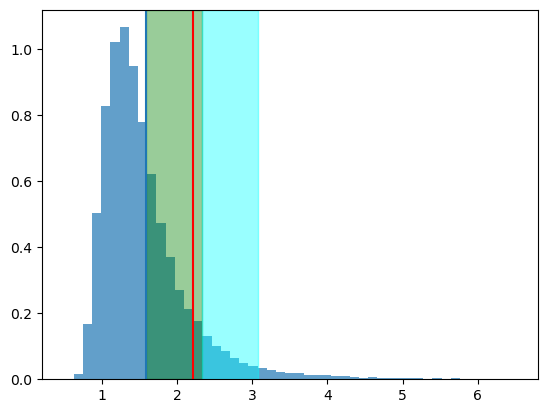

ATLASJ029.9915-36.5658


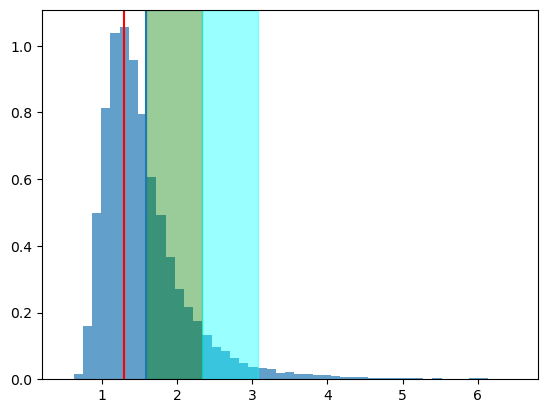

In [6]:
from scipy import stats
# high z spectra
hnnfile = np.loadtxt(hpath + 'previous/highZ_NN_full_sc.txt',dtype='str')
hnn_id = hnnfile[:,0]
hnn_Ds = hnnfile[:,6:]
hd_means = np.array([np.mean([float(j) for j in nn]) for nn in hnn_Ds])

# Exclude BAL and reddened quasars
exc = ['J1535+1943','PSOJ215.15-16.04','ULASJ0148+0600','ULASJ1207+0630','VIKJ2318-3029','PSOJ183-12']
filter = np.array([x in exc for x in hnn_id])
hnn_id = hnn_id[~filter]
hnn_Ds = hnn_Ds[~filter]
hd_means = hd_means[~filter]


pvalue=[]
for n in names:
    dmean_trim = np.loadtxt('/media/bartosz/USB STICK/highz_data/eBOSS_NN_trim/mfp_results/{}_NN.txt'.format(n))
    dmean_trim = dmean_trim[:,1]

    # Kernel Density Estimation
    # eBOSS
    kernel = gaussian_kde(dmean_trim, bw_method='scott')

    # highz index
    index = np.where(hnn_id == n)

    # highz distance
    d = hd_means[index[0][0]]
    prob = kernel.integrate_box_1d(d,np.inf)

    pvalue.append(prob)
    std = np.std(dmean_trim)
    mean = np.mean(dmean_trim)
    sigma = (d-mean)/std
    print(n)
    
    # plot histogram
    bins = np.linspace(0.5, 6.5, 50)
    fig, ax = plt.subplots()
    # ax.set_facecolor('lightgrey')
    # ax.patch.set_alpha(0.5)
    ax.hist(dmean_trim,bins,density=True,alpha=0.7,color='tab:blue',label='$n={}$'.format(len(dmean_trim)))
    ax.axvline(mean)
    ax.axvspan(mean,mean+std,color='green',alpha=0.4)
    ax.axvspan(mean+std,mean+2*std,color='cyan',alpha=0.4)
    ax.axvline(d,color='red')
    plt.show()

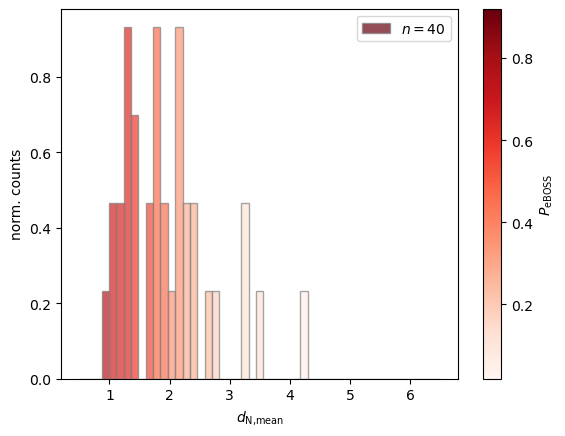

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0.5, 6.5, 50)
fig, ax = plt.subplots()
cnts, values, bars = ax.hist(hd_means, bins, edgecolor='grey', density=True, alpha=0.7, label=r'$n=40$')
pvalue_sorted = sorted(pvalue,reverse=True)

# Define the colormap and normalization
cmap = plt.cm.Reds
norm = plt.Normalize(vmin=min(pvalue_sorted), vmax=max(pvalue_sorted))

# Loop over each bar to set the facecolor and create a color legend
for cnt, c, bar in zip(cnts, pvalue_sorted, bars):
    bar.set_facecolor(cmap(norm(c)))  # Use the colormap to set facecolor
    #bar.set_label(f'Value: {c:.2f}')  # Add label for legend

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'$P_\text{eBOSS}$')



ax.legend()  # Show legend

plt.xlabel(r'$d_\text{N,mean}$')
plt.ylabel('norm. counts')
#plt.savefig('plots/XShooter_distr_updated.pdf',format='pdf')
plt.show()


In [8]:
N = 1000      # number of samples drawn
samples = dict()
for n in names:
    dmean_trim = np.loadtxt('/media/bartosz/USB STICK/highz_data/eBOSS_NN_trim/mfp_results/{}_NN.txt'.format(n))
    dmean_trim = dmean_trim[:,1]

    # Kernel Density Estimation
    # eBOSS
    kernel = gaussian_kde(dmean_trim, bw_method='scott')

    # Draw random sample
    sample = []
    for j in range(N):
        draw = random.choice(dmean_trim)
        prob = kernel.integrate_box_1d(draw,np.inf)
        sample.append(prob)
    samples['{}'.format(n)] = sample
    print(n, '- done')

ATLASJ025.6821-33.4627 - done
CFHQSJ1509-1749 - done
PSOJ036+03 - done
SDSSJ0100+2802 - done
SDSSJ0818+1722 - done
SDSSJ0836+0054 - done
SDSSJ0927+2001 - done
SDSSJ1030+0524 - done
SDSSJ1306+0356 - done
ULASJ1319+0950 - done
J0108+0711 - done
J1335-0328 - done
J2100-1715 - done
J2207-0416 - done
PSOJ004+17 - done
PSOJ011+09 - done
PSOJ056-16 - done
PSOJ159-02 - done
PSOJ308-21 - done
PSOJ340-18 - done
VDESJ0330-4025 - done
VIKJ0046-2837 - done
PSOJ060+24 - done
PSOJ242-12 - done
PSOJ308-27 - done
PSOJ359-06 - done
J1212+0505 - done
PSOJ025-11 - done
PSOJ217-16 - done
VDESJ0224-4711 - done
PSOJ158-14 - done
PSOJ029-29 - done
PSOJ323+12 - done
ATLASJ029.9915-36.5658 - done


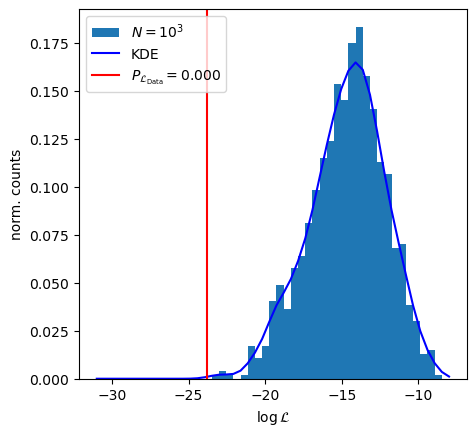

Data likelihood p-value:  0.0004479979074216064


In [9]:
# Data likelihood
L_d = np.prod(pvalue)


# Multiply corresponding elements using zip and a loop
s_pvalues = []
for values in zip(*samples.values()):
    s_pvalues.append(np.log10(np.prod(values)))

# bins = np.logspace(-30,-10,30)
bins = np.linspace(-31,-8,50)

kernel_lh = gaussian_kde(s_pvalues, bw_method='scott')
y = kernel_lh.pdf(bins)

# Calculate p-value for data likelihood 
p_L = kernel_lh.integrate_box_1d(-np.inf,np.log10(L_d))


fig, ax = plt.subplots()
fig.set_figwidth(5)
ax.hist(s_pvalues,bins,density=True,label=r'$N=10^{:.0f}$'.format(np.log10(N)))

ax.plot(bins,y,color='blue',label='KDE')
ax.axvline(np.log10(L_d), color='red',label=r'$P_{{\mathcal{{L}}_\text{{Data}}}} = {:.3f}$'.format(p_L))
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r'$\log \mathcal{L}$')
ax.set_ylabel('norm. counts')

# handles, labels = ax.get_legend_handles_labels()
# custom_handles = [plt.Line2D([0], [0], color='red', linewidth=1)]
# custom_labels = [r'$\mathcal{L}_\text{Data} = {{.2f}}$'.format(p_L)]

# legend = ax.legend(custom_handles, custom_labels, loc='lower right', fontsize='small', title='# recovered neighbors')

plt.legend(loc='upper left')
# plt.savefig('plots/likelihoods_distr.png',format='png')
plt.show()

print('Data likelihood p-value: ', p_L) 

In [19]:
print(pvalue)

[0.5866424607366809, 0.6685759282958872, 0.6522770917954499, 0.9193150378365417, 0.3467843809873729, 0.27278673075803495, 0.7345352162689841, 0.1471046191100847, 0.8154811946537935, 0.16345736473592526, 0.8539751714816797, 0.34309712404045484, 0.551263447680777, 0.06726844508761229, 0.11322681691215523, 0.2515215111303097, 0.11243777612331679, 0.02570396564213709, 0.06352505279678067, 0.010453085804062115, 0.0881895203263936, 0.050256447871587784, 0.04309494678394002, 0.4521389829728454, 0.025734811091706458, 0.014903476509198928, 0.09294892945651574, 0.1274851578076267, 0.14783436764235683, 0.043618542615364464, 0.45780171060144004, 0.2693477682236026, 0.23562695766634265, 0.018637835399801777, 0.16747671520618265, 0.5814669831607265, 0.1129160162165429, 0.6366770177104396, 0.005517835102979614, 0.6345172882195607]
